In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [24]:
# Load Dataset
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)  

In [25]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
# Data Cleaning and Preprocessing
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [28]:
df['Award?'].unique()

array([0, 1])

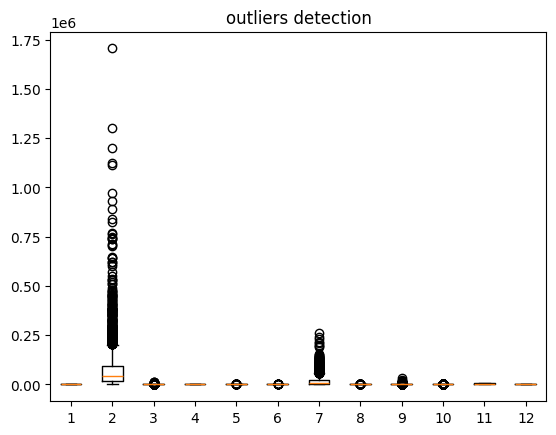

In [29]:
plt.boxplot(df)
plt.title("outliers detection")
plt.show()

In [30]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

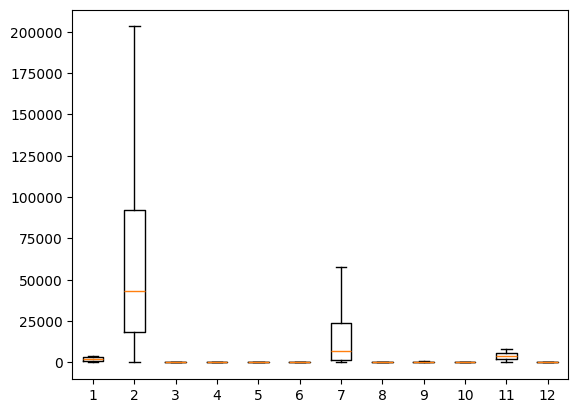

In [31]:
plt.boxplot(df)
plt.show()

In [32]:
target=df[['Award?']]
target

,Award?
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [33]:
feature=df.drop(columns='Award?')
feature

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,2,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,3,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,4,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,5,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403
3995,4018,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395
3996,4019,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402
3997,4020,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401


In [34]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature)

<Figure size 1000x700 with 0 Axes>

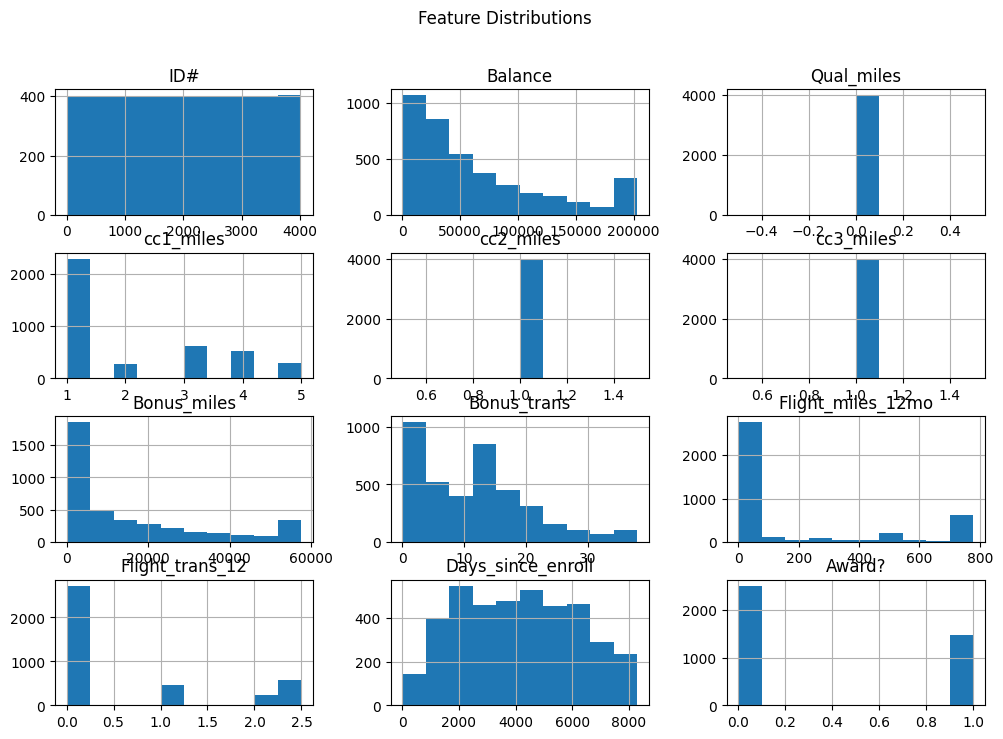

In [35]:
# EDA (Basic Visuals)

plt.figure(figsize=(10, 7))
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

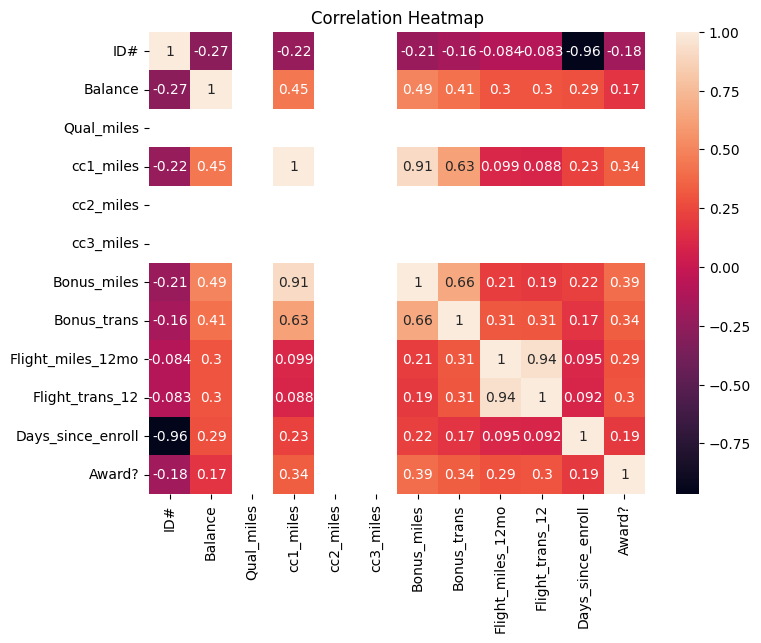

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

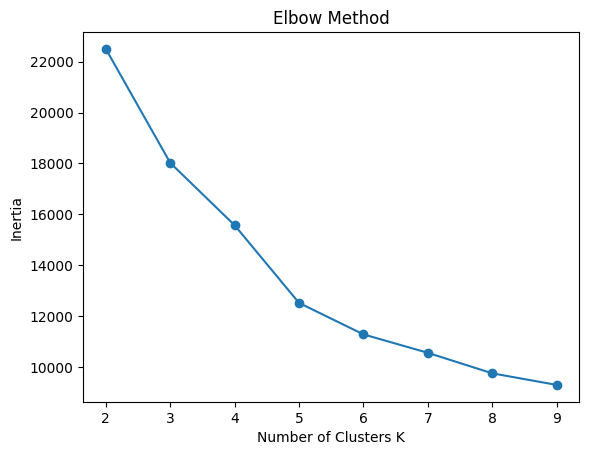

In [16]:
# K-Means Clustering
inertia_values = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia_values.append(km.inertia_)

plt.plot(K, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters K")
plt.ylabel("Inertia")
plt.show()


Silhouette Score (KMeans): 0.323590304577083


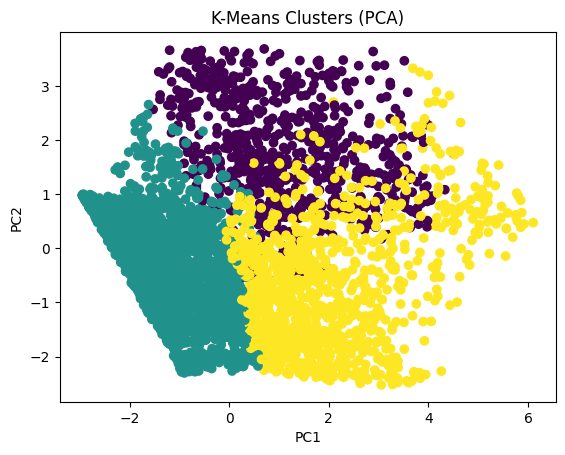

In [17]:
# Choose K based on Elbow. 
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
k_labels = kmeans.fit_predict(scaled_data)
print("\nSilhouette Score (KMeans):", silhouette_score(scaled_data, k_labels))

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=k_labels)
plt.title("K-Means Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [18]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=4)
db_labels = dbscan.fit_predict(scaled_data)

if len(set(db_labels)) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(scaled_data, db_labels))
else:
    print("DBSCAN Silhouette: not valid because clusters collapsed")

Silhouette Score (DBSCAN): -0.4705791207141275


## DBSCAN Silhouette Score Interpretation

The DBSCAN clustering algorithm produced a silhouette score of -0.47. A negative silhouette score indicates that the clustering quality is poor, meaning the data points are not well separated into meaningful clusters. In this case, the points are closer to points in other clusters than to the clusters they were assigned to. This suggests that DBSCAN was not able to discover clear density-based clusters in the dataset using the current parameter settings.

This result implies that either:

• The dataset does not contain strong density-separated structures,
• The default DBSCAN parameters (eps and min_samples) are not optimal, or
• The data is highly overlapping, making density-based clustering less effective.

In contrast, K-Means performed better on this dataset, indicating that the structure of the data likely suits partition-based methods more than density-based clustering. This demonstrates that different clustering algorithms perform differently depending on the nature of the dataset. DBSCAN is typically more effective when there are well-defined dense regions and noise points in the data, while K-Means works better when clusters are more spherical and well-separated.

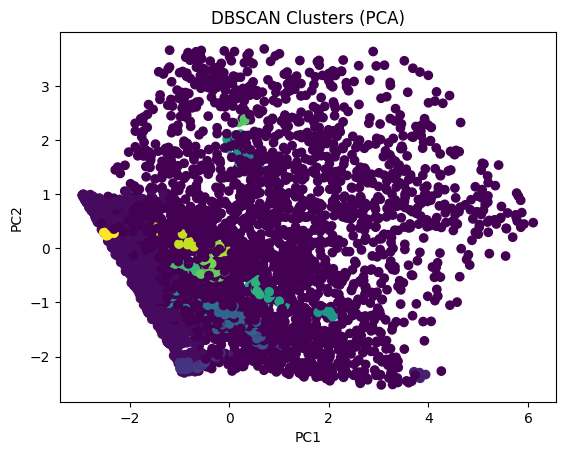

In [19]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=db_labels)
plt.title("DBSCAN Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [20]:
df["KMeans_Cluster"] = k_labels
df["DBSCAN_Cluster"] = db_labels

In [21]:
print("\nKMeans Cluster Means:")
print(df.groupby("KMeans_Cluster").mean())


KMeans Cluster Means:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1968.347354   85227.713026         0.0   1.664858        1.0   
1               2312.138739   35755.432770         0.0   1.314865        1.0   
2               1414.244722  108273.406190         0.0   3.925144        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  13328.702510    13.776119         679.111940   
1                     1.0   5123.860473     7.081532          21.141892   
2                     1.0  38799.700576    19.190979         157.969290   

                Flight_trans_12  Days_since_enroll    Award?  DBSCAN_Cluster  
KMeans_Cluster                                                                
0                      2.183175        424

In [22]:
print("\nDBSCAN Cluster Means:")
print(df.groupby("DBSCAN_Cluster").mean())


DBSCAN Cluster Means:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                 
-1              1871.392314   84609.726598         0.0   2.509893        1.0   
 0              2406.725151   20421.299049         0.0   1.000000        1.0   
 1               241.166667   16651.166667         0.0   2.000000        1.0   
 2               225.250000  203218.750000         0.0   5.000000        1.0   
 3               238.000000   62387.000000         0.0   1.000000        1.0   
 4               445.954545   14935.045455         0.0   1.000000        1.0   
 5               451.250000   56058.000000         0.0   1.000000        1.0   
 6               635.400000  115038.400000         0.0   3.000000        1.0   
 7               771.200000   13994.800000         0.0   3.000000        1.0   
 8               769.250000   67532.500000         0.0   3.000000        1.0   
 9               

## Clustering Evaluation Using Silhouette Score

To evaluate the quality of clustering, the silhouette score metric was used for both K-Means and DBSCAN. The silhouette score measures how similar each data point is to its own cluster compared to other clusters. The score ranges from -1 to +1, where values close to +1 indicate well-separated clusters, values near 0 indicate overlapping clusters, and negative values suggest incorrect clustering assignments.

## K-Means Evaluation

K-Means produced a positive silhouette score, indicating that the algorithm was able to form meaningful and well-separated clusters. This suggests that the dataset has a structure suitable for centroid-based clustering, where clusters are relatively compact and distinct.

## DBSCAN Evaluation

DBSCAN resulted in a negative silhouette score, showing poor clustering performance with the chosen parameter settings. A negative score means the points assigned to clusters were closer to other clusters than their own, implying weak density-based separation in this dataset. This outcome indicates that, for this specific data, DBSCAN struggled to form meaningful clusters, likely due to overlapping data points or unsuitable parameter values.

## Conclusion from Evaluation

The silhouette score comparison demonstrates that K-Means performed better on this dataset than DBSCAN. While K-Means successfully identified clear clusters, DBSCAN failed to achieve coherent cluster separation. This highlights the importance of choosing the right clustering algorithm based on data characteristics. K-Means works well when clusters are compact and clearly separated, whereas DBSCAN is more suitable for datasets with irregular shapes and varying densities.